In [1]:
#Import dependencies for pandas, matplotlib, and numpy
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
#Create random lat and long combinations making each array a variable into a zip object
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
#Add lat and long to a list
coordinates = list(lat_lngs)

In [4]:
#Use citipy to determine city based on lat and long
from citipy import citipy

In [5]:
#Create a list for holding cities
cities = []
#Identify nearest city for each lat and long combination
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    #If city is unique,  add to cities list
    if city not in cities:
        cities.append(city)

#Print city ct
len(cities)

625

In [6]:
#Import datetime mod
import time
from datetime import datetime

In [7]:
#Import requests and API key
import requests
from config import weather_api_key

In [8]:
#Start WeatherMap API Call
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8dcb8a0d2ef379acc6016f419eeb9b57


In [9]:
#Create empty list to hold weather data
city_data = []
#Print beginning of the logging
print("Beginning Data Retrieval     ")
print("-----------------------------")

#Create counters
record_count = 1
set_count = 1

    
#Loop through all cities
for i, city in enumerate(cities):

    #Group cities in sets of 50
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    #Create endpoint URL with each city
    city_url = url + "&q=" + city

    #Log URL, record, and set numbers and city
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    #Add 1 to count
    record_count += 1
    
    #Run API request for each
    try:
        #Parse JSON and retrieve data
        city_weather = requests.get(city_url).json()
        #Parse out needed data
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        #Convert date to ISO
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        
        #Append city info into city data
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})


        
        #If error occurs, skip the city
    except:
        print("City not found. Skipping...")
        pass

#Check Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | korem
Processing Record 2 of Set 1 | gigmoto
Processing Record 3 of Set 1 | samarai
Processing Record 4 of Set 1 | svetlyy
Processing Record 5 of Set 1 | avarua
Processing Record 6 of Set 1 | faanui
Processing Record 7 of Set 1 | saint-philippe
Processing Record 8 of Set 1 | nikolskoye
Processing Record 9 of Set 1 | jamestown
Processing Record 10 of Set 1 | east london
Processing Record 11 of Set 1 | qaanaaq
Processing Record 12 of Set 1 | barabai
Processing Record 13 of Set 1 | tautira
Processing Record 14 of Set 1 | biltine
Processing Record 15 of Set 1 | belushya guba
City not found. Skipping...
Processing Record 16 of Set 1 | amderma
City not found. Skipping...
Processing Record 17 of Set 1 | jining
Processing Record 18 of Set 1 | pevek
Processing Record 19 of Set 1 | kloulklubed
Processing Record 20 of Set 1 | gat
Processing Record 21 of Set 1 | batagay
Processing Record 22 of Set 1 | norman

Processing Record 37 of Set 4 | san francisco
Processing Record 38 of Set 4 | makat
Processing Record 39 of Set 4 | angoche
Processing Record 40 of Set 4 | bulgan
Processing Record 41 of Set 4 | vostok
Processing Record 42 of Set 4 | karkaralinsk
City not found. Skipping...
Processing Record 43 of Set 4 | cidreira
Processing Record 44 of Set 4 | lompoc
Processing Record 45 of Set 4 | beringovskiy
Processing Record 46 of Set 4 | praia
Processing Record 47 of Set 4 | uray
Processing Record 48 of Set 4 | statesboro
Processing Record 49 of Set 4 | taltal
Processing Record 50 of Set 4 | margate
Processing Record 1 of Set 5 | santa vitoria do palmar
Processing Record 2 of Set 5 | senanga
Processing Record 3 of Set 5 | souillac
Processing Record 4 of Set 5 | westport
Processing Record 5 of Set 5 | viseu
Processing Record 6 of Set 5 | noumea
Processing Record 7 of Set 5 | garmsar
Processing Record 8 of Set 5 | sao joao de pirabas
Processing Record 9 of Set 5 | srednekolymsk
Processing Record 1

Processing Record 25 of Set 8 | codrington
Processing Record 26 of Set 8 | chaoyang
Processing Record 27 of Set 8 | kangaatsiaq
Processing Record 28 of Set 8 | saint-pierre
Processing Record 29 of Set 8 | bilma
Processing Record 30 of Set 8 | beloha
Processing Record 31 of Set 8 | palimbang
Processing Record 32 of Set 8 | vicuna
Processing Record 33 of Set 8 | aurora
Processing Record 34 of Set 8 | aiken
Processing Record 35 of Set 8 | shorapur
Processing Record 36 of Set 8 | bolshoye sorokino
City not found. Skipping...
Processing Record 37 of Set 8 | kaka
Processing Record 38 of Set 8 | san cristobal
Processing Record 39 of Set 8 | magadan
Processing Record 40 of Set 8 | pedernales
Processing Record 41 of Set 8 | progreso
Processing Record 42 of Set 8 | juuru
Processing Record 43 of Set 8 | kovdor
Processing Record 44 of Set 8 | zyryanka
Processing Record 45 of Set 8 | alta floresta
Processing Record 46 of Set 8 | izhma
Processing Record 47 of Set 8 | meulaboh
Processing Record 48 of

Processing Record 14 of Set 12 | pavlodar
Processing Record 15 of Set 12 | porto walter
Processing Record 16 of Set 12 | quatre cocos
Processing Record 17 of Set 12 | tumannyy
City not found. Skipping...
Processing Record 18 of Set 12 | luderitz
Processing Record 19 of Set 12 | bolobo
Processing Record 20 of Set 12 | sidney
Processing Record 21 of Set 12 | agdas
Processing Record 22 of Set 12 | saleaula
City not found. Skipping...
Processing Record 23 of Set 12 | mbandaka
Processing Record 24 of Set 12 | aktau
Processing Record 25 of Set 12 | odessa
Processing Record 26 of Set 12 | hualmay
Processing Record 27 of Set 12 | terekli-mekteb
Processing Record 28 of Set 12 | cairns
Processing Record 29 of Set 12 | along
Processing Record 30 of Set 12 | canon city
Processing Record 31 of Set 12 | haines junction
Processing Record 32 of Set 12 | lokosovo
Processing Record 33 of Set 12 | karasjok
Processing Record 34 of Set 12 | vaijapur
Processing Record 35 of Set 12 | khandbari
Processing Rec

In [10]:
#Check number of cities
len(city_data)

572

In [11]:
#Convert array of dictionaries to a Pandas DF
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Korem,12.5058,39.5228,55.29,59,9,2.66,ET,2021-12-16 05:18:20
1,Gigmoto,13.7796,124.3900,80.91,89,96,19.95,PH,2021-12-16 05:18:20
2,Samarai,-10.6167,150.6667,82.47,74,100,1.43,PG,2021-12-16 05:18:21
3,Svetlyy,54.6750,20.1347,46.45,95,100,18.41,RU,2021-12-16 05:18:21
4,Avarua,-21.2078,-159.7750,80.65,83,48,9.22,CK,2021-12-16 05:18:22
5,Faanui,-16.4833,-151.7500,81.03,76,23,14.25,PF,2021-12-16 05:18:22
6,Saint-Philippe,-21.3585,55.7679,83.79,77,24,11.77,RE,2021-12-16 05:18:22
7,Nikolskoye,59.7035,30.7861,35.80,91,64,8.39,RU,2021-12-16 05:18:23
8,Jamestown,42.0970,-79.2353,55.33,41,75,4.00,US,2021-12-16 05:16:35
9,East London,-33.0153,27.9116,63.54,72,0,17.27,ZA,2021-12-16 05:18:23


In [12]:
#Reorder column
new_column_order = ["City","Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Korem,ET,2021-12-16 05:18:20,12.5058,39.5228,55.29,59,9,2.66
1,Gigmoto,PH,2021-12-16 05:18:20,13.7796,124.3900,80.91,89,96,19.95
2,Samarai,PG,2021-12-16 05:18:21,-10.6167,150.6667,82.47,74,100,1.43
3,Svetlyy,RU,2021-12-16 05:18:21,54.6750,20.1347,46.45,95,100,18.41
4,Avarua,CK,2021-12-16 05:18:22,-21.2078,-159.7750,80.65,83,48,9.22
...,...,...,...,...,...,...,...,...,...
567,Road Town,VG,2021-12-16 05:18:39,18.4167,-64.6167,78.01,66,3,23.89
568,Moroni,KM,2021-12-16 05:21:44,-11.7022,43.2551,86.00,58,20,11.50
569,Ariquemes,BR,2021-12-16 05:22:21,-9.9133,-63.0408,73.87,98,100,2.08
570,Harda,IN,2021-12-16 05:22:21,22.3333,77.1000,76.57,39,98,3.85


In [13]:
#Create output (CSV)
output_data_file = "cities.csv"

#Export CityData into CSV
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [14]:
#Extract relevant fields from DF for plotting
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

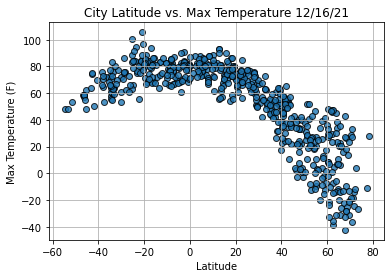

In [15]:
#Import time mod
import time

#scatter plot for lat vs. max temp
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

#Inc additional properties
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

#Save
plt.savefig("Fig1.png")
#Show
plt.show()

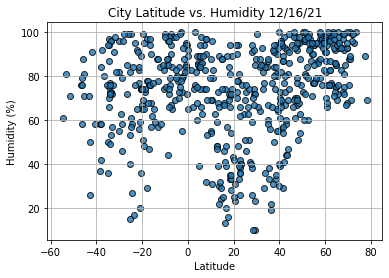

In [16]:
#scatter plot for lat vs. humidity
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

#Inc additional properties
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

#Save
plt.savefig("Fig2.png")
#Show
plt.show()

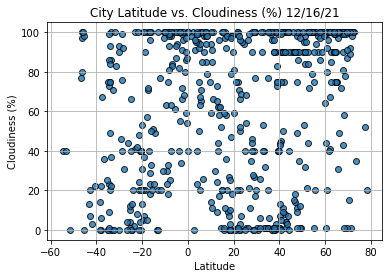

In [17]:
#scatter plot for lat vs. cloudiness
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

#Inc additional properties
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
#Save
plt.savefig("Fig3.png")
#Show
plt.show()

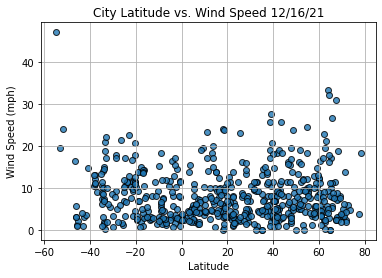

In [18]:
#scatter plots for lat vs. wind sp
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

#Inc additionbal properties
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

#Save
plt.savefig("Fig4.png")
#Show
plt.show()

In [19]:
#Create hemisphere for city data df
index13 = city_data_df.loc[13]
index13

City                      Biltine
Country                        TD
Date          2021-12-16 05:18:25
Lat                       14.5333
Lng                       20.9167
Max Temp                    67.91
Humidity                       24
Cloudiness                     52
Wind Speed                  10.11
Name: 13, dtype: object

In [27]:
#Show N hemisphere lat >=0 for true or false (filter based on value)
city_data_df["Lat"] >= 0

0       True
1       True
2      False
3       True
4      False
       ...  
567     True
568    False
569    False
570     True
571     True
Name: Lat, Length: 572, dtype: bool

In [28]:
#adding head() shows just the first 5 rows of a DF
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Korem,ET,2021-12-16 05:18:20,12.5058,39.5228,55.29,59,9,2.66
1,Gigmoto,PH,2021-12-16 05:18:20,13.7796,124.3900,80.91,89,96,19.95
3,Svetlyy,RU,2021-12-16 05:18:21,54.6750,20.1347,46.45,95,100,18.41
7,Nikolskoye,RU,2021-12-16 05:18:23,59.7035,30.7861,35.80,91,64,8.39
8,Jamestown,US,2021-12-16 05:16:35,42.0970,-79.2353,55.33,41,75,4.00


In [31]:
#imp linear regression from SciPy
from scipy.stats import linregress

In [99]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.  
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    
    #Run regression on hemi weather data
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    print(r_value)
    
    #Calc regression line "y values" from slope and intercept
    regress_values = x_values * slope + intercept
    
    #Get equation of the line
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    #Create scatter and plot the regression line
    plt.scatter(x_values,y_values, color="red")
    plt.plot(x_values,regress_values,"r")
    #Annotate text in line equation
    plt.annotate(line_eq, text_coordinates, fontsize=30, color="aqua")
    plt.xlabel("Latitude")
    plt.ylabel(y_label)
    plt.title(title)
    plt.show()

In [100]:
#set values for N and S hemisphere DFs >=0 for N  <=0 for S
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

-0.8672724446812053


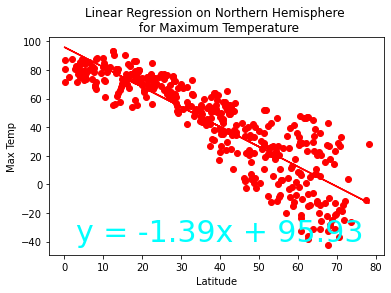

In [101]:
#set def for values in Linear regression for N Hemi            (max temps)
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]

#Call function made in "def plot_linear_regression"
plot_linear_regression(x_values, y_values, 
                       "Linear Regression on Northern Hemisphere \n for Maximum Temperature",
                       "Max Temp",(3,-40))

0.506554137248314


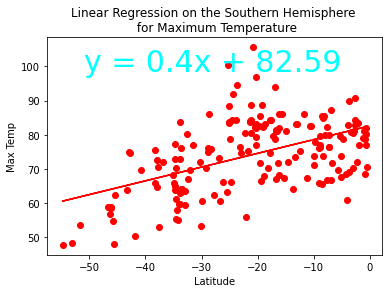

In [102]:
#def values for regression on S Hemisphere and set regression formula location     (max temps)
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]

#Call function
plot_linear_regression(x_values, y_values,
                       "Linear Regression on the Southern Hemisphere \n for Maximum Temperature", "Max Temp",(-51,98.5))

0.40246342060548


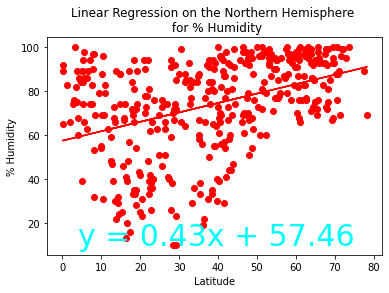

In [114]:
#def values for regression on N Hemisphere and set regression formula location     (humidity)
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]

#Call function
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for % Humidity', '% Humidity',(4,10))

0.2355238993646854


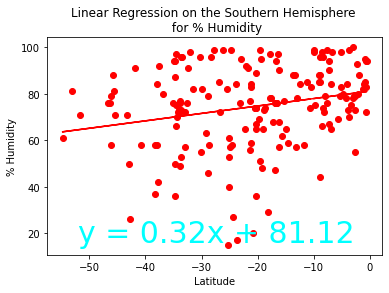

In [113]:
#def values for regression on S Hemisphere and set regression formula location     (humidity)
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]

#call function
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Humidity', '% Humidity',(-52,16))

0.20882941974792749


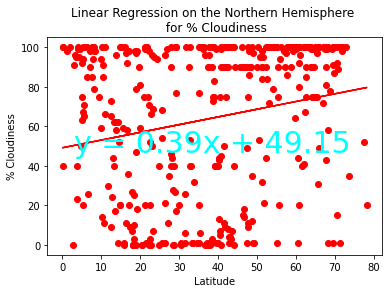

In [123]:
#Skill!!!   regression for cloudiness in N hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]

#Call function
plot_linear_regression(x_values, y_values,
                       "Linear Regression on the Northern Hemisphere \n for % Cloudiness", 
                       "% Cloudiness",(3,47))

0.34233894437598533


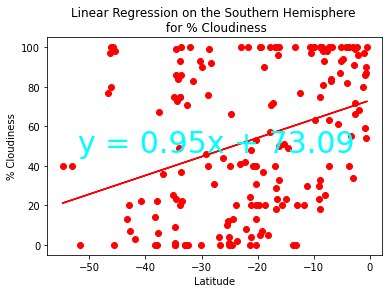

In [129]:
#Repeat for S Hemisphere regression for cloudiness
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]

#Call function
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Cloudiness', 
                       '% Cloudiness',(-52,47))

0.10680102320732478


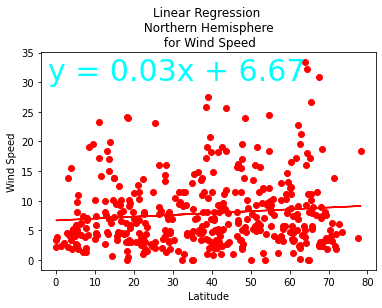

In [156]:
#Lin regression on N Hemisphere for wind speed
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]

#all function
plot_linear_regression(x_values, y_values,
                       "Linear Regression \n Northern Hemisphere \n for Wind Speed", "Wind Speed",(-2,30.4))

-0.24691891766652144


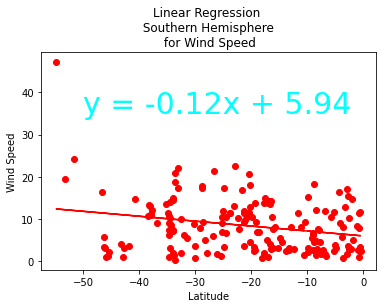

In [148]:
#Linear regression on S Hemisphere for wind speed
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]


#Call function
plot_linear_regression(x_values, y_values,
                       "Linear Regression \n Southern Hemisphere \n for Wind Speed", "Wind Speed",(-50,35))